## Explorar las ofertas relámpago, ¿qué insightspuedes generar?

### Entendimiento y exploración de los datos

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import svm 

In [200]:
data_set = pd.read_csv(r'C:\Users\juano\Analítica II\MercadoLibre\WorkSample- Applied Intelligence\ofertas_relampago.csv')
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

In [202]:
# Verificar si tenemos valores nulos en las alguna de las variables
print(data_set.describe())

       INVOLVED_STOCK  REMAINING_STOCK_AFTER_END   SOLD_AMOUNT  SOLD_QUANTITY
count    48746.000000               48746.000000  24579.000000   24579.000000
mean        35.007508                  30.565216     51.208898      10.851052
std        206.761058                 195.813806    175.254414      45.475305
min          1.000000                -192.000000      0.280000       1.000000
25%          5.000000                   4.000000      5.730000       1.000000
50%         10.000000                   8.000000     12.420000       3.000000
75%         15.000000                  15.000000     30.925000       6.000000
max       9000.000000                8635.000000   4836.570000    1646.000000


In [204]:
object_describe=data_set.describe(include=["object"]).T 
object_describe

,count,unique,top,freq
OFFER_START_DATE,48746,61,2021-07-30,1300
OFFER_START_DTTM,48746,783,2021-07-30 13:00:00+00:00,414
OFFER_FINISH_DTTM,48746,7578,2021-07-06 13:00:01+00:00,77
OFFER_TYPE,48746,1,lightning_deal,48746
ORIGIN,11316,1,A,11316
SHIPPING_PAYMENT_TYPE,48746,2,free_shipping,26658
DOM_DOMAIN_AGG1,48746,36,HOME&DECOR,6742
VERTICAL,48746,9,APP & SPORTS,13241
DOMAIN_ID,48746,1266,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,1759


In [206]:
SHIPPING_PAYMENT_TYPE = set(data_set['SHIPPING_PAYMENT_TYPE'])
print(SHIPPING_PAYMENT_TYPE)

{'none', 'free_shipping'}


In [208]:
data_set = data_set.drop(['OFFER_TYPE', 'ORIGIN','SHIPPING_PAYMENT_TYPE'], axis=1)
data_set.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4,-2,4.72,6.0,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,NaN,NaN,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,15,0,39.65,15.0,COMPUTERS,CE,MLM-HEADPHONES


In [210]:
# existen valores nulos en cada columna
print(data_set.isnull().sum())


OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64


In [212]:
# Procedemos a conververtir las variables OFFER_START_DTTM y OFFER_FINISH_DTTM en tiempo ya que se están tomando como objetos y no permite analizar el tiempo de duración de las ofertas
data_set['OFFER_START_DATE']=pd.to_datetime(data_set['OFFER_START_DATE'])
data_set['OFFER_START_DTTM']=pd.to_datetime(data_set['OFFER_START_DTTM'])
data_set['OFFER_FINISH_DTTM']=pd.to_datetime(data_set['OFFER_FINISH_DTTM'])
data_set['OFFER_DURATION']=(data_set['OFFER_FINISH_DTTM']-data_set['OFFER_START_DTTM']).apply(lambda x: x.total_seconds()/3600)
data_set['OFFER_START_DTTM'] =data_set['OFFER_START_DTTM'].dt.strftime('%H:%M:%S')
data_set['OFFER_FINISH_DTTM'] =data_set['OFFER_FINISH_DTTM'].dt.strftime('%H:%M:%S')

data_set.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION
0,2021-06-22,16:00:00,23:02:43,4,-2,4.72,6.0,PETS FOOD,CPG,MLM-BIRD_FOODS,7.045278
1,2021-06-22,13:00:00,19:00:02,5,5,NaN,NaN,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,6.000556
2,2021-06-22,07:00:00,13:00:01,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS,6.000278
3,2021-06-22,19:00:00,01:36:12,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES,6.603333
4,2021-06-22,13:00:00,15:48:12,15,0,39.65,15.0,COMPUTERS,CE,MLM-HEADPHONES,2.803333


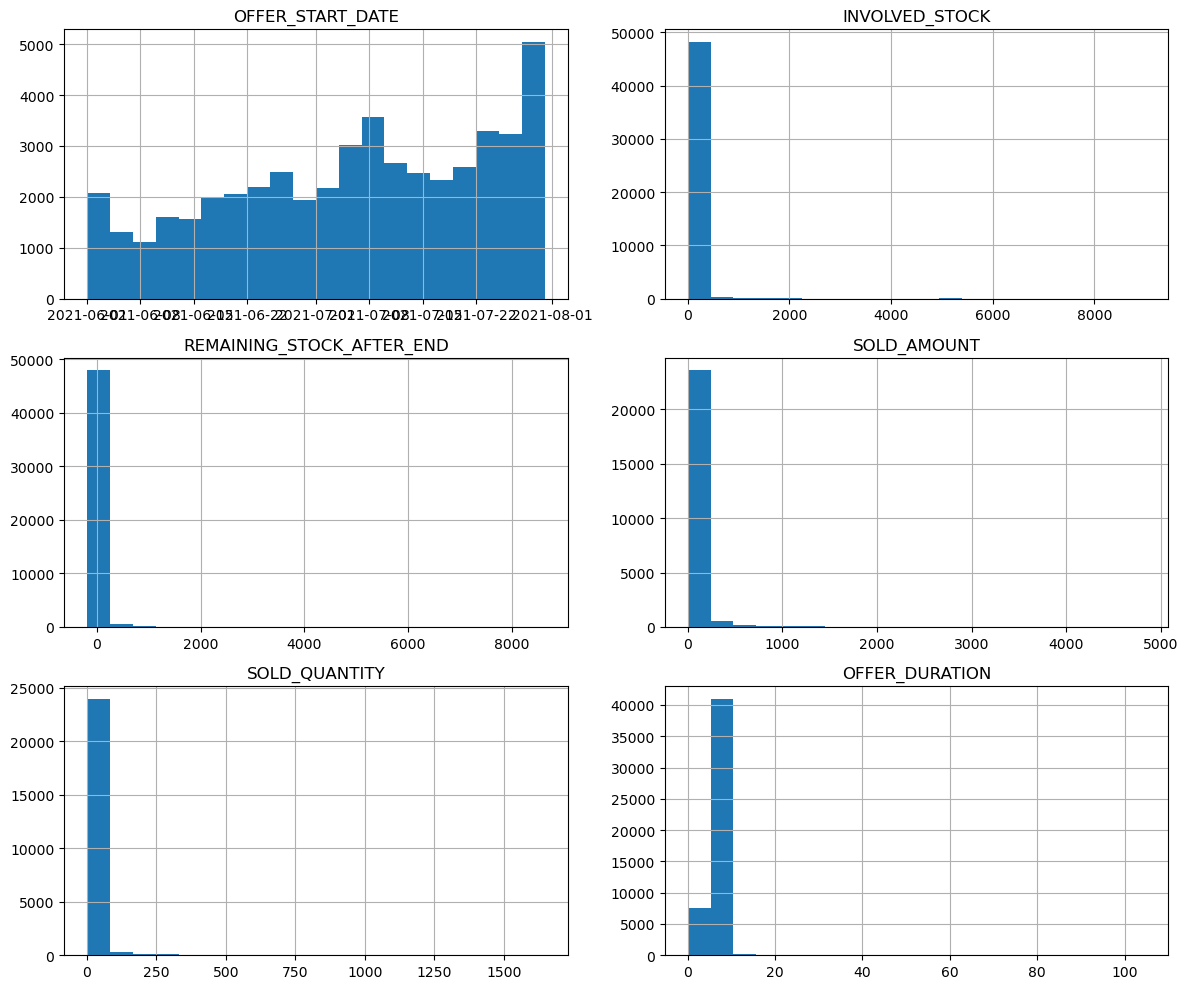

In [214]:
data_set.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

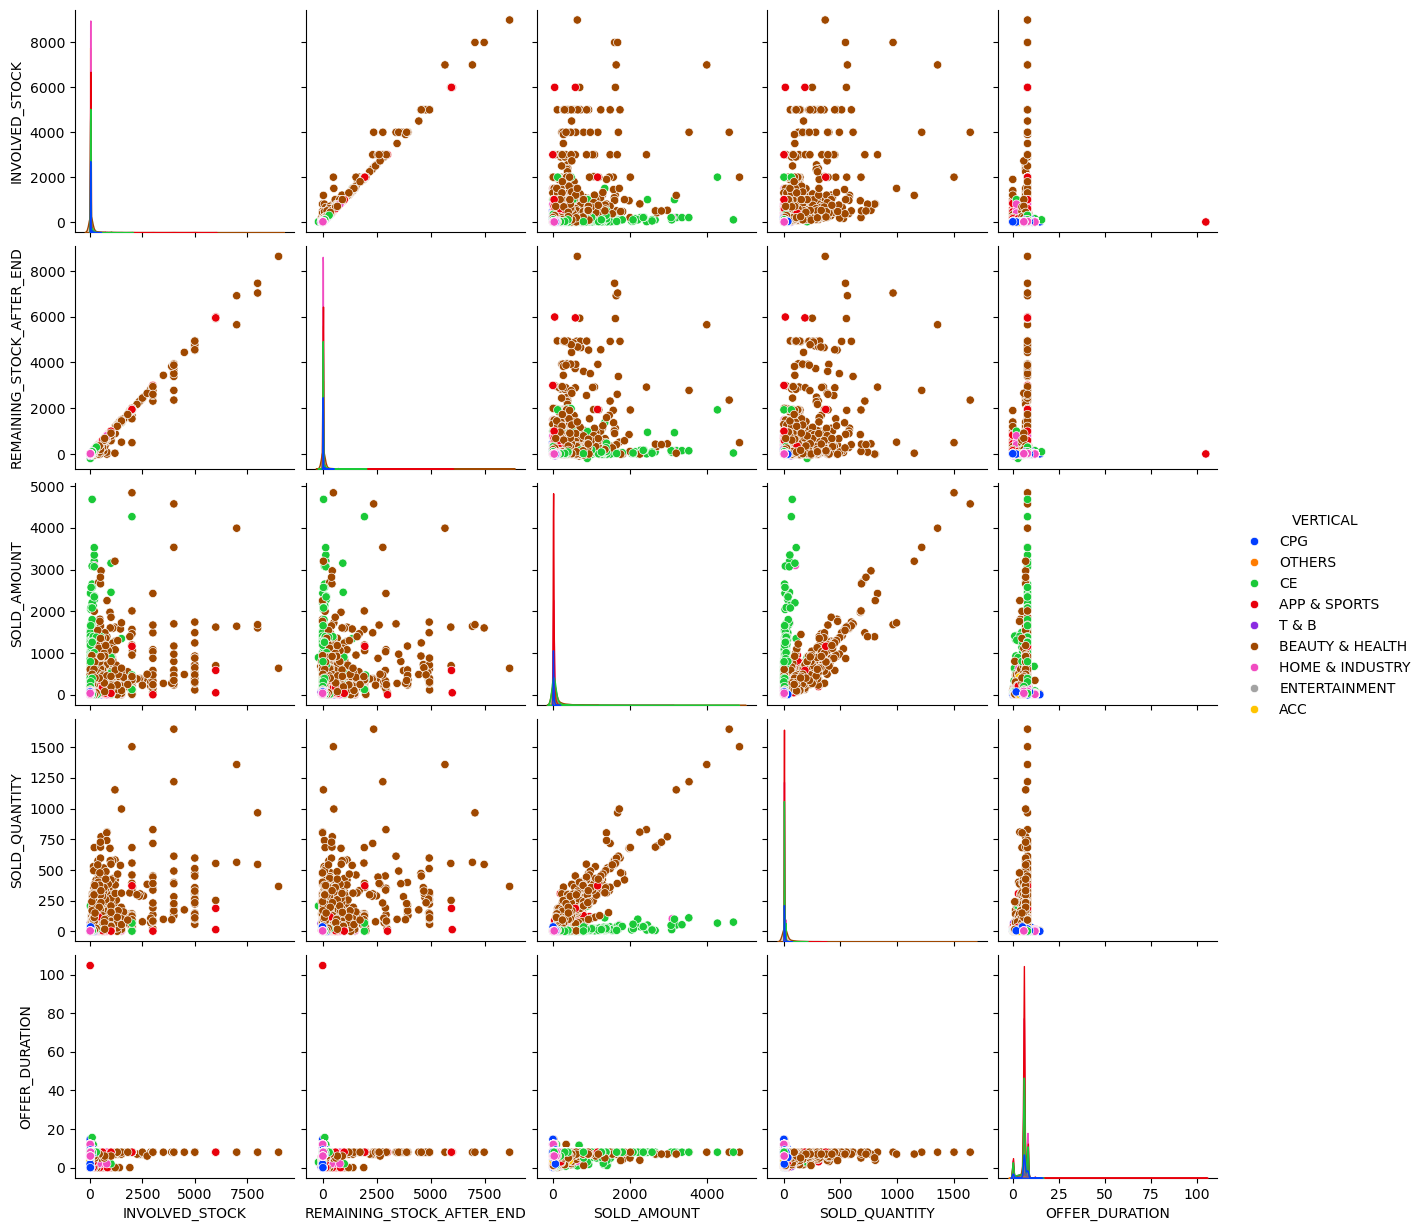

In [216]:
sns.pairplot(data_set,hue="VERTICAL",palette="bright")

In [221]:
object_columns=data_set.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(data_set[object_columns[i]].value_counts()) 

----- OFFER_START_DTTM-----
OFFER_START_DTTM
13:00:00    14287
19:00:00    12884
07:00:00    12574
12:00:00     2226
17:00:00     1354
11:00:00     1268
15:00:00     1228
14:00:00      987
16:00:00      828
10:00:00      380
18:00:00      321
20:00:00      113
09:00:00       89
08:00:00       55
01:00:00       54
21:00:00       43
22:00:00       21
06:00:00       10
02:00:00        9
03:00:00        8
23:00:00        4
00:00:00        1
05:00:00        1
04:00:00        1
Name: count, dtype: int64
----- OFFER_FINISH_DTTM-----
OFFER_FINISH_DTTM
19:00:00    2453
19:00:01    2418
13:00:01    2367
13:00:00    2302
19:00:02    2121
            ... 
00:23:41       1
00:43:58       1
12:32:52       1
11:33:19       1
13:52:50       1
Name: count, Length: 4798, dtype: int64
----- DOM_DOMAIN_AGG1-----
DOM_DOMAIN_AGG1
HOME&DECOR                      6742
APPAREL ACCESORIES              4387
APPAREL                         3856
COMPUTERS                       3770
SPORTS                          

In [223]:
# Hay datos no disponibles.  Revisemos el porcentaje de los mismos.
nan_percentage = data_set.isna().sum() * 100 / len(data_set)
missing_percentage_df = pd.DataFrame({'column_name': data_set.columns, 'percent_missing': nan_percentage}).reset_index(drop=True)
missing_percentage_df

,column_name,percent_missing
0,OFFER_START_DATE,0.000000
1,OFFER_START_DTTM,0.000000
2,OFFER_FINISH_DTTM,0.000000
3,INVOLVED_STOCK,0.000000
4,REMAINING_STOCK_AFTER_END,0.000000
5,SOLD_AMOUNT,49.577401
6,SOLD_QUANTITY,49.577401
7,DOM_DOMAIN_AGG1,0.000000
8,VERTICAL,0.000000
9,DOMAIN_ID,0.000000


                           INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  \
INVOLVED_STOCK                   1.000000                   0.994240   
REMAINING_STOCK_AFTER_END        0.994240                   1.000000   
SOLD_AMOUNT                      0.405859                   0.354320   
SOLD_QUANTITY                    0.557684                   0.484031   
OFFER_DURATION                   0.098543                   0.099981   

                           SOLD_AMOUNT  SOLD_QUANTITY  OFFER_DURATION  
INVOLVED_STOCK                0.405859       0.557684        0.098543  
REMAINING_STOCK_AFTER_END     0.354320       0.484031        0.099981  
SOLD_AMOUNT                   1.000000       0.708884        0.120777  
SOLD_QUANTITY                 0.708884       1.000000        0.061757  
OFFER_DURATION                0.120777       0.061757        1.000000  


<Axes: >

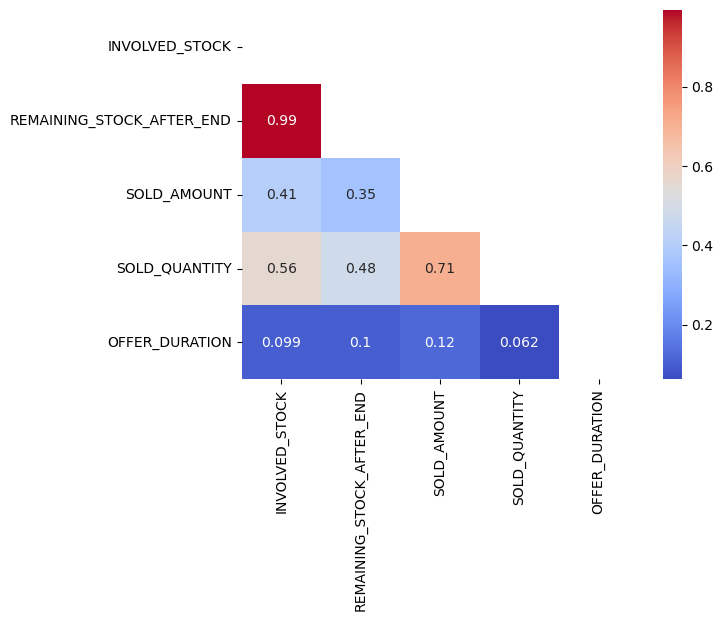

In [229]:

# Revisemos las correlaciones entre las variables
data_numeric = data_set.select_dtypes(include=[float, int])

# Calcular la matriz de correlación solo para las columnas numéricas
corr = data_numeric.corr()

# Mostrar la matriz de correlación
print(corr)

corr=data_numeric.corr()
mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask) 